In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
dados = pd.read_csv('arquivos/alucel.csv')
dados

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17
...,...,...
56,2018-11-26,10773.53
57,2018-11-27,22984.56
58,2018-11-28,9216.26
59,2018-11-29,12147.61


In [3]:
dados.dtypes

dia        object
vendas    float64
dtype: object

In [4]:
dados['dia'] = pd.to_datetime(dados['dia'])
dados.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [5]:
print('Quantidade de linhas e colunas: ', dados.shape)
print('Quantidade de dados nulos: ', dados.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [12]:
def plotar(título, labelx, labely, x, y, dataset):
    grafico1 = sns.lineplot(x = x, y = y, data = dataset)
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    grafico1.figure.set_size_inches(12, 6)
    grafico1.set_title(título, loc = 'left', fontsize = 18)
    grafico1.set_xlabel(labelx, fontsize = 14)
    grafico1.set_ylabel(labely, fontsize = 14)
    grafico1 = grafico1

In [6]:
def plot_comparacao(x, y1, y2, y3, dataset, título):
    plt.figure(figsize = (16,12))
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    grafico1 = plt.subplot(3, 1, 1)
    grafico1.set_title(título, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x = x, y = y3, data = dataset)
    grafico1 = grafico1

In [7]:
dados['aumento'] = dados['vendas'].diff()
dados['aceleração'] = dados['aumento'].diff()

In [8]:
dados

,dia,vendas,aumento,aceleração
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51
...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84
57,2018-11-27,22984.56,12211.03,13937.49
58,2018-11-28,9216.26,-13768.30,-25979.33
59,2018-11-29,12147.61,2931.35,16699.65


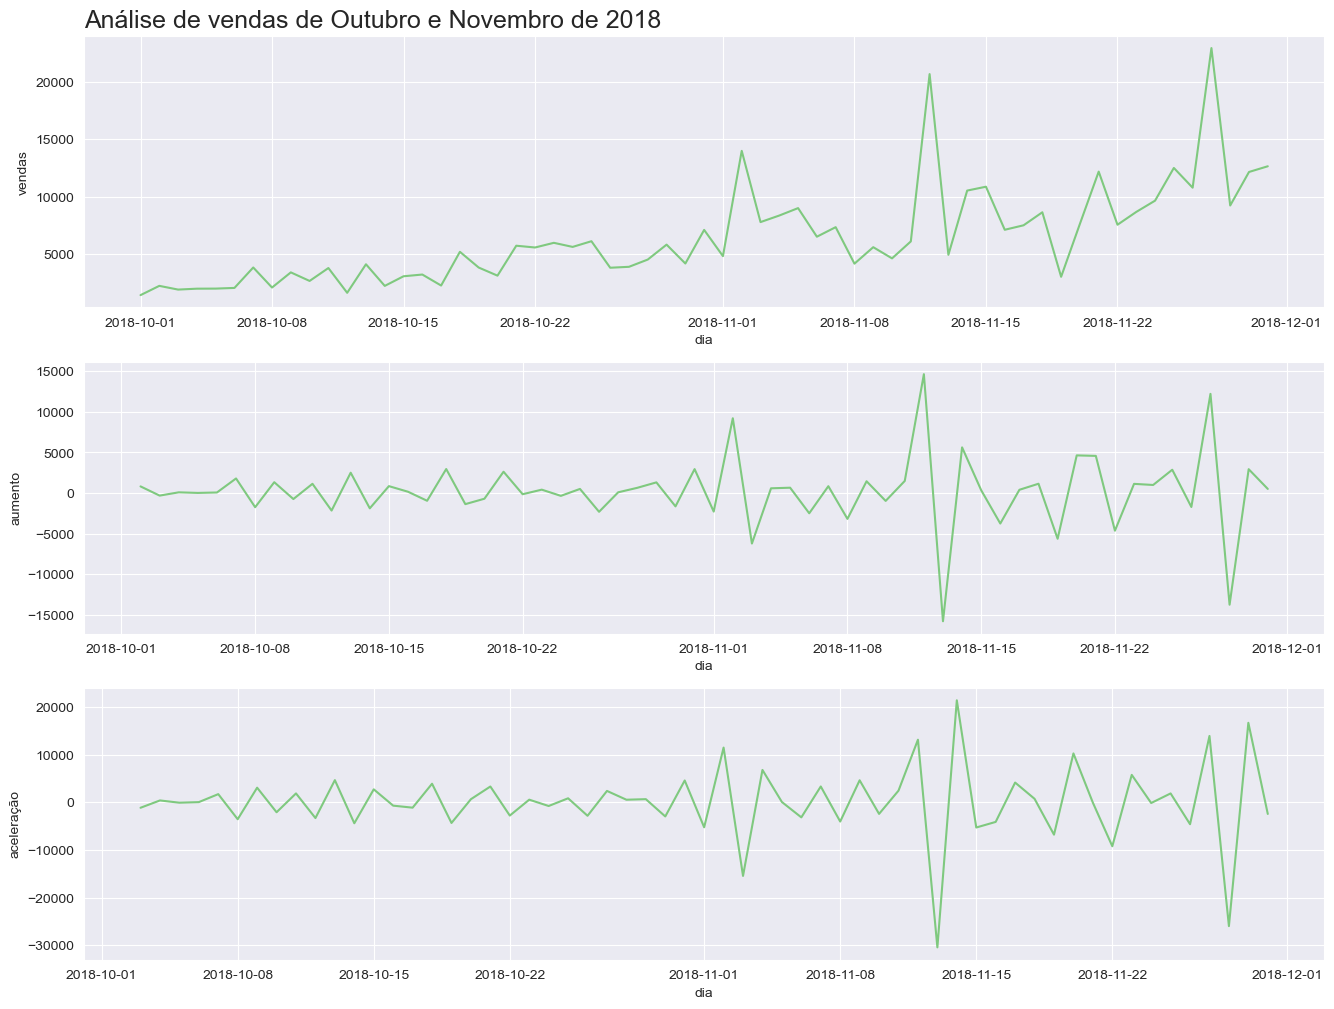

In [9]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleração', dados, 'Análise de vendas de Outubro e Novembro de 2018')

## Média Móvel

In [10]:
dados['media_movel'] = dados['vendas'].rolling(7).mean()

In [11]:
dados

,dia,vendas,aumento,aceleração,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
...,...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84,9840.835714
57,2018-11-27,22984.56,12211.03,13937.49,12037.211429
58,2018-11-28,9216.26,-13768.30,-25979.33,11613.995714
59,2018-11-29,12147.61,2931.35,16699.65,12273.428571


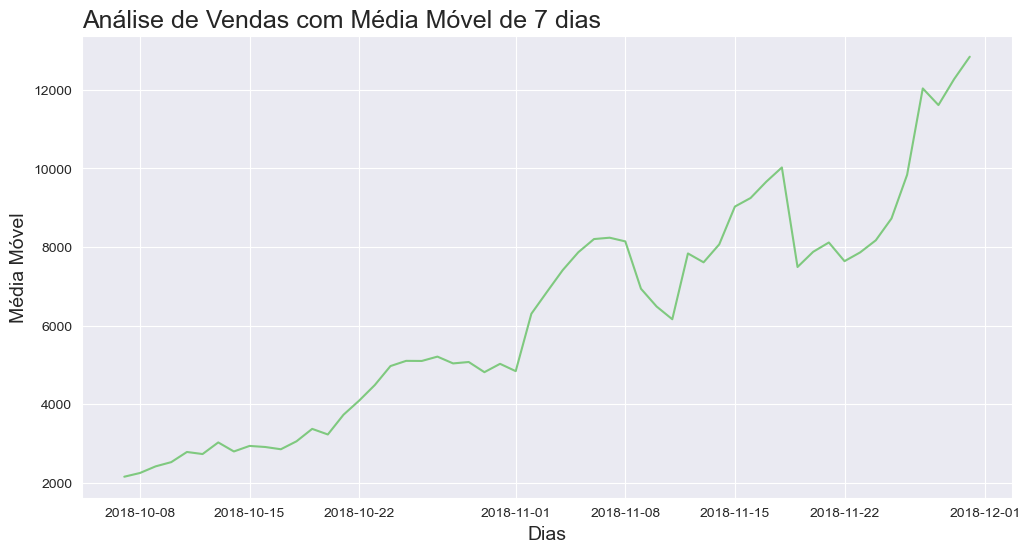

In [14]:
plotar('Análise de Vendas com Média Móvel de 7 dias', 'Dias', 'Média Móvel', 'dia', 'media_movel', dados)